In [1]:
import sys
sys.path.append('/home/kevinteng/Desktop/BrainTumourSegmentation')
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import os, random
import utils
from utils_vis import plot_comparison, plot_labels_color, show_lable_on_image4 
from utils import dice_coef, ss_metric, compute_metric
import nibabel as nib
import medpy.io
%matplotlib inline

/home/kevinteng/anaconda3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kevinteng/anaconda3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kevinteng/anaconda3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kevinteng/anaconda3/lib/python3.6/site-package

In [9]:
def grid_plot_brain(patient_id_list, slice_idx_list,
                    mode='training', captions=None,
                    captions_font=20, save_as='png',
                    save_name=None, save_dpi = 600,
                    figsize=(18, 18), axes_pad=0.05):
    input_imgs = []
    for patient_id in patient_id_list:
        if mode=='validation':
            img_data = '/home/kevinteng/Desktop/ssd02/BraTS2020_preprocessed03/Validation_pre/BraTS20_Validation_{}.npy'.format(patient_id)
            img_seg ='/home/kevinteng/Desktop/ssd02/submission/Validation_pre/BraTS20_Validation_{}.nii.gz'.format(patient_id)
            #
        elif mode=='training':
            img_data = '/home/kevinteng/Desktop/ssd02/BraTS2020_preprocessed03/Training_pre/BraTS20_Training_{}.npy'.format(patient_id)
            img_seg = '/home/kevinteng/Desktop/ssd02/submission/Training_pre/BraTS20_Training_{}.nii.gz'.format(patient_id)
        #
        img_npy = np.load(img_data)
        predict_seg,_ = medpy.io.load(img_seg)
        for slice_idx in slice_idx_list:
            #append modalities Flair, t1, t1ce, t2
            for i in range(4):
                input_imgs.append(img_npy[slice_idx,:,:,i])
            if mode=='training':
                #append flair with GT
                input_imgs.append(show_lable_on_image4(img_npy[slice_idx,:,:,0],img_npy[slice_idx,:,:,-1]))
            #append flair with predicted seg
            input_imgs.append(show_lable_on_image4(img_npy[slice_idx,:,:,0],predict_seg[:,:,slice_idx]))

    fig = plt.figure(figsize=figsize)
    nimgs = len(input_imgs)
    if mode=='validation':
        ncols = 5 #without labels(flair, t1, t1ce, t2, predicted labels)
    elif mode=='training':
        ncols = 6 #with labels(flair, t1, t1ce, t2, gt, predicted labels)
    nrows = nimgs//ncols 
    grid = ImageGrid(fig, 111, nrows_ncols=(nrows, ncols), axes_pad=axes_pad)
    
    cap_idx = 0
    for steps,(ax, im) in enumerate(zip(grid,input_imgs)):
        for i in range(0,nimgs,ncols):
            #modalities should be in gray scale as well
            if steps<i+4:
                ax.imshow(im, cmap='gray')
                ax.set_xticks([])
                ax.set_yticks([])
            else:
                ax.imshow(im)
                ax.set_xticks([])
                ax.set_yticks([])
        if (captions is not None and steps>=nimgs-ncols and cap_idx<len(captions)):
            ax.set_xlabel(captions[cap_idx], fontsize=captions_font)
            cap_idx+=1
    #save as high res format
    if save_as!=None:
        plt.savefig('/home/kevinteng/Desktop/ssd02/eps/{}.{}'.format(save_name, save_as), 
                    format=save_as, save_dpi=600)
    plt.show()

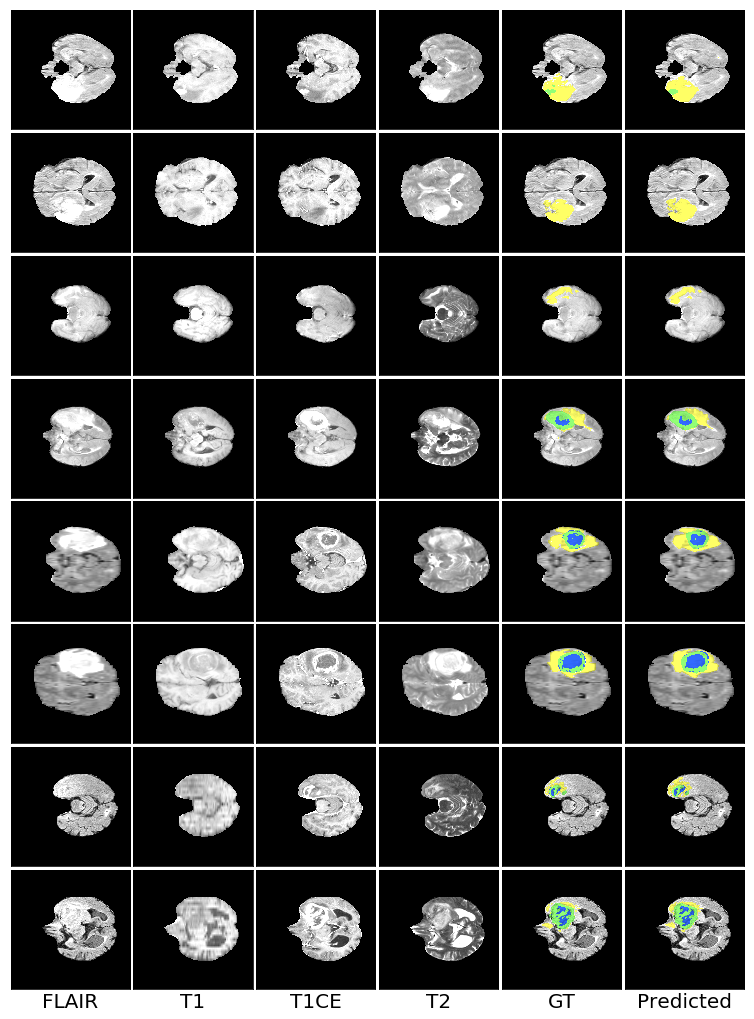

In [12]:
patient_id_list = [250, 270, 343, 338]
slice_idx_list = [50,65]
captions = ['FLAIR', 'T1', 'T1CE', 'T2', 'GT', 'Predicted']

grid_plot_brain(patient_id_list, slice_idx_list, mode='training', captions=captions, 
                save_name='training_output_grid', save_as='eps', save_dpi = 300)

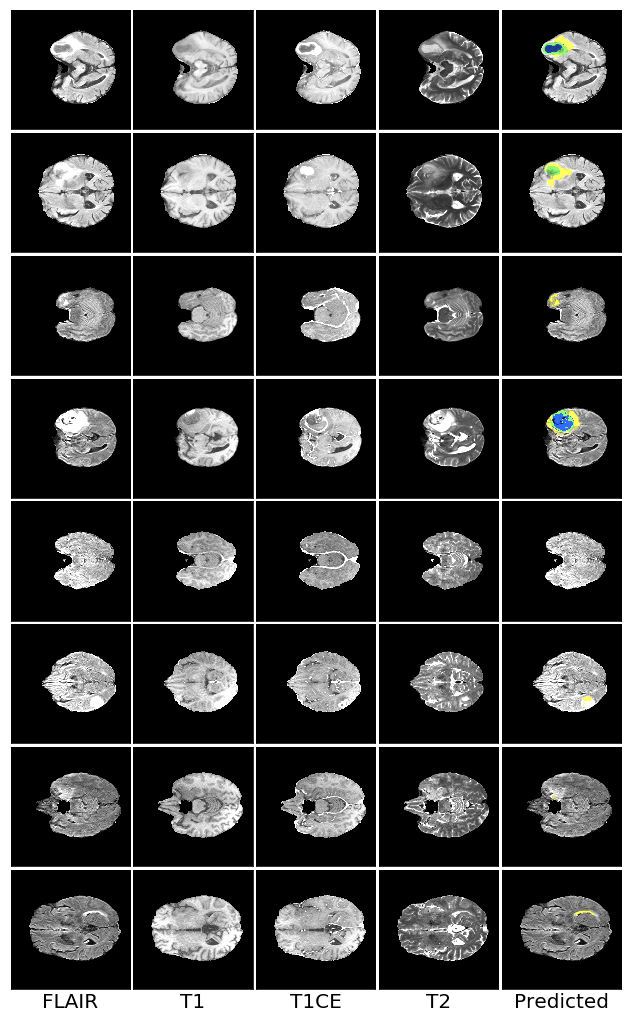

In [13]:
patient_id_list = ['024','019','011','001']
slice_idx_list = [50,65]
captions = ['FLAIR', 'T1', 'T1CE', 'T2','Predicted']

grid_plot_brain(patient_id_list, slice_idx_list, mode='validation', captions=captions, 
                save_name='validation_output_grid', save_as='eps', save_dpi = 300)